In [1]:
%matplotlib inline

import os
import cv2
import numpy as np
import glob

import matplotlib.pyplot as plt

In [5]:
IMAGE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/"
SAVE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/"

In [2]:
import shutil
from shutil import copyfile

In [6]:
def rename_files(paths = IMAGE_PATH, save_path = SAVE_PATH, start = 0, repeated = True):
    if not repeated:
        path = paths

        for dirname, _, filenames in os.walk(path):
            for i, filename in enumerate(filenames):
                dst = os.path.join(save_path, "{0:04d}.png".format(i + start))
                src = os.path.join(dirname, filename)

                copyfile(src, dst)
    else:
        for path in paths:
            print("---",path,"---")
            for dirname, _, filenames in os.walk(path):
                for i, filename in enumerate(filenames):
                    dst = os.path.join(save_path, "{0:04d}.png".format(i + start))
                    src = os.path.join(dirname, filename)

                    copyfile(src, dst)

                start += i

In [8]:
def get_files(path):
    files = []
    files_path = []

    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            files.append(filename)
            files_path.append(dirname + filename)

    return [files, files_path]

In [9]:
def create_labels(path = IMAGE_PATH, save_path = SAVE_PATH):
    [files, files_path] = get_files(path)
    
    current = 0

    for file, file_path in zip(files, files_path):
        ori = cv2.pyrDown(cv2.imread(file_path, cv2.IMREAD_UNCHANGED))
        ori = cv2.cvtColor(ori, cv2.COLOR_BGRA2BGR)
        
        img = ori

        mask = np.zeros(img.shape[:2], np.uint8)

        bgdModel = np.zeros((1, 65), np.float64)
        fgdModel = np.zeros((1, 65), np.float64)

        rect = (0, 0, img.shape[1], 472)

        cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 25, cv2.GC_INIT_WITH_RECT)

        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
        img = img * mask2[:, :, np.newaxis]

        background = ori - img
        background[np.where((background > [0, 0, 0]).all(axis = 2))] = [255, 255, 255]

        img = background + img

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, thresh1 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

        bilateral = cv2.bilateralFilter(thresh1, 10, 75, 75)
        ret, thresh1 = cv2.threshold(bilateral, 0, 100, cv2.THRESH_BINARY_INV)
        
        cv2.imwrite(save_path + file, thresh1)

        current = current + 1

        print(f"{current} image of total {len(files)} images")
        print(save_path + file)

In [10]:
def path_to_img(paths, flag=cv2.IMREAD_COLOR):
    imgs = []

    for path in paths:
        imgs.append(cv2.imread(path, flag))
        
    return imgs

In [11]:
def plot_labels(imgs, paths, n_row = 10, n_col = 10, figsize = (12, 12), bottom = 0.1, \
                right = 0.8, top = 0.9):
    
    _, axs = plt.subplots(n_row, n_col, figsize=figsize)
    axs = axs.flatten()

    for img, path, ax in zip(imgs, paths, axs):
        ax.title.set_text(os.path.split(path)[1])
        ax.imshow(img)

    plt.subplots_adjust(bottom = bottom, right = right, top = top)
    plt.show()

## Only Appropriately Labeled Image

In [ ]:
IMAGE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/"
SAVE_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/"

In [ ]:
paths = get_files(IMAGE_PATH)[1]

In [ ]:
paths

['/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0340.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0003.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0194.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0306.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0270.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0101.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0322.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0232.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0117.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0091.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0049.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0027.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs/0272.png',
 '/home/enfy

In [ ]:
exist_label_img = []

In [ ]:
for path in paths:
    exist_label_img.append(SAVE_PATH + np.os.path.split(path)[1])

In [ ]:
exist_label_img

['/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0340.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0003.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0194.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0306.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0270.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0101.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0322.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0232.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0117.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0091.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0049.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labels/0027.png',
 '/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/labe

In [ ]:
paths = exist_label_img

In [ ]:
imgs = path_to_img(paths = paths, flag = cv2.IMREAD_GRAYSCALE)

In [ ]:
plot_labels(imgs = imgs, \
            paths = paths, \
            n_row = len(imgs), \
            n_col = 1, \
            figsize = (10, 550))

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import skimage.io

In [2]:
DEFAULT_PATH = "/home/enfycius"

In [3]:
SAMPLE_LABEL_IMAGES = "/home/enfycius/Documents/test.csv"

In [4]:
train_df = pd.read_csv(SAMPLE_LABEL_IMAGES)

In [5]:
train_df.head()

,annotation_id,annotator,created_at,id,image,label,lead_time,tag,updated_at
0,1,1,2023-08-21T18:36:48.874436Z,283,/data/local-files/?d=Datasets/IMG_0245.png,"[{""points"":[[10.304532577903684,52.69121813031...",400.98,"[{""x"":82.6721586160028,""y"":54.9446408999589,""r...",2023-08-21T18:56:02.659305Z


In [6]:
img_path = train_df.iloc[0, 4]

In [7]:
img_path

'/data/local-files/?d=Datasets/IMG_0245.png'

In [8]:
img_path = '/' + img_path.split('=')[1]

In [9]:
_, file_names = os.path.split(img_path)

In [10]:
file_names

'IMG_0245.png'

In [11]:
img_path = DEFAULT_PATH + img_path

In [12]:
img_path

'/home/enfycius/Datasets/IMG_0245.png'

In [68]:
img = cv2.imread(img_path)
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

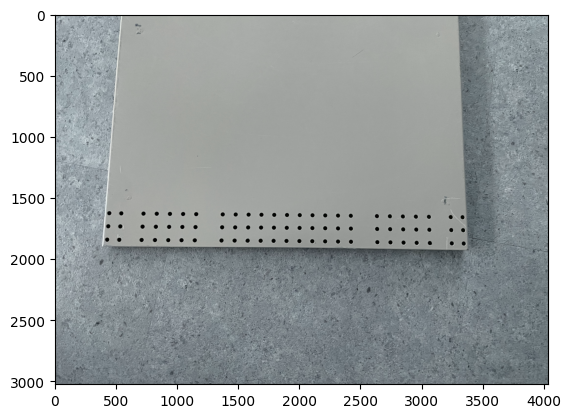

In [69]:
plt.imshow(img)
plt.show()

In [70]:
mask = np.zeros(img.shape[:2], np.uint8)

In [71]:
cast = train_df.iloc[0]

In [72]:
new_cast = pd.read_json(cast[5])

In [73]:
new_cast

,points,closed,polygonlabels,original_width,original_height
0,"[[10.304532577903684, 52.69121813031161], [9.4...",True,[Bolt Connection],4032,3024


In [74]:
new_cast.original_width

0    4032
Name: original_width, dtype: int64

In [75]:
points = np.array(pd.read_json(train_df.iloc[0][5]).points[0], dtype=np.float32)

In [76]:
points

array([[10.304533, 52.69122 ],
       [ 9.454674, 63.031162],
       [83.71105 , 63.88102 ],
       [83.71105 , 52.832863]], dtype=float32)

In [77]:
points[:, 0] = np.round(points[:, 0] * pd.read_json(train_df.iloc[0][5]).original_width[0] / 100)

In [78]:
points[:, 1] = np.round(points[:, 1] * pd.read_json(train_df.iloc[0][5]).original_height[0] / 100)

In [79]:
points

array([[ 415., 1593.],
       [ 381., 1906.],
       [3375., 1932.],
       [3375., 1598.]], dtype=float32)

In [80]:
from typing import List

In [81]:
def fillPolygon(points: List[int], height: int, width: int) -> np.array:
    img = np.zeros((width, height, 1), dtype = np.uint8)

    cv2.fillPoly(img, [points], 2)
    
    return img    

In [87]:
connection_mask = fillPolygon(points = np.array(points, dtype=np.int32), height = mask.shape[1], width = mask.shape[0])

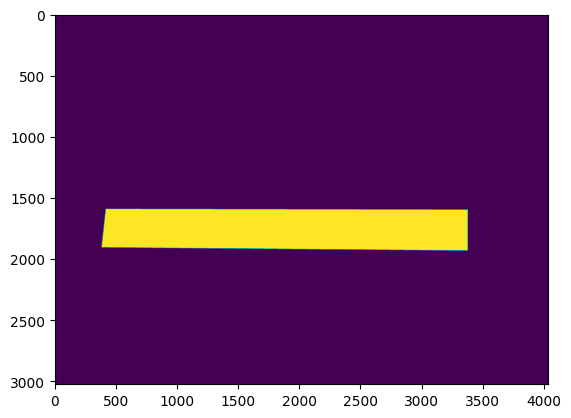

In [88]:
plt.imshow(connection_mask)
plt.show()

In [89]:
pd.read_json(train_df.iloc[0][7])

,x,y,radiusX,radiusY,rotation,ellipselabels,original_width,original_height
0,82.672159,54.944641,0.417379,0.571097,0,[Bolt],4032,3024
1,82.793747,58.464926,0.417379,0.571097,0,[Bolt],4032,3024
2,80.275122,54.921481,0.417379,0.571097,0,[Bolt],4032,3024
3,80.396711,58.418607,0.417379,0.571097,0,[Bolt],4032,3024


In [90]:
x = np.round(pd.read_json(train_df.iloc[0][7]).x * pd.read_json(train_df.iloc[0][7]).original_width / 100)

In [91]:
y = np.round(pd.read_json(train_df.iloc[0][7]).y * pd.read_json(train_df.iloc[0][7]).original_height / 100)

In [92]:
x

0    3333.0
1    3338.0
2    3237.0
3    3242.0
dtype: float64

In [93]:
y

0    1662.0
1    1768.0
2    1661.0
3    1767.0
dtype: float64

In [94]:
radius_x = np.round(pd.read_json(train_df.iloc[0][7]).radiusX * pd.read_json(train_df.iloc[0][7]).original_width / 100)

In [95]:
radius_y = np.round(pd.read_json(train_df.iloc[0][7]).radiusY * pd.read_json(train_df.iloc[0][7]).original_height / 100)

In [96]:
radius_x

0    17.0
1    17.0
2    17.0
3    17.0
dtype: float64

In [97]:
radius_y

0    17.0
1    17.0
2    17.0
3    17.0
dtype: float64

In [190]:
import pandas

In [191]:
center = pd.concat([x, y], axis=1, keys=["x", "y"], join="inner").astype("int16")

In [192]:
center

,x,y
0,3333,1662
1,3338,1768
2,3237,1661
3,3242,1767


In [193]:
radius = pd.concat([radius_x, radius_y], axis=1, keys=["x", "y"], join="inner").astype("int16")

In [194]:
radius

,x,y
0,17,17
1,17,17
2,17,17
3,17,17


In [12]:
def drawEllipse(center, radius, height, width):
    img = np.zeros((width, height, 1), dtype = np.uint8)

    for index in range(0, len(center)):
        img = cv2.ellipse(img, (center.x[index], center.y[index]), (radius.x[index], radius.y[index]), 0, 0, 360, 1, -1)
    
    return img

In [203]:
bolt_mask = drawEllipse(center, radius, height = mask.shape[1], width = mask.shape[0])

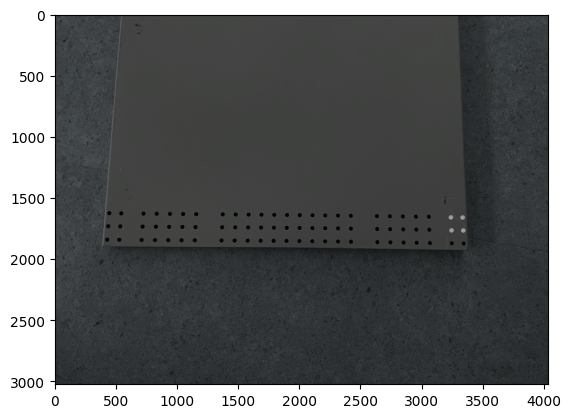

In [204]:
plt.imshow(img)
plt.imshow(bolt_mask, cmap='binary_r', alpha=0.6)
plt.show()

In [205]:
dst = cv2.addWeighted(connection_mask, 1, bolt_mask, 1, 0)

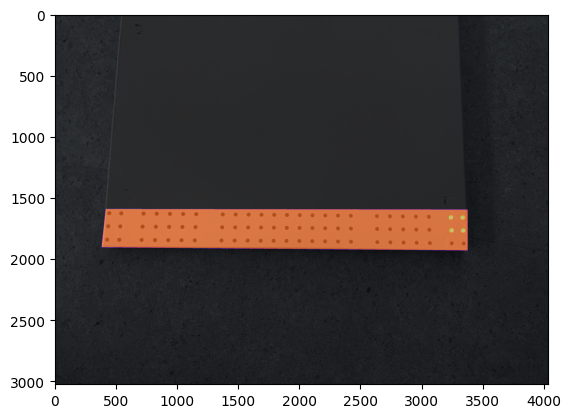

In [206]:
plt.imshow(img)
plt.imshow(dst, cmap='inferno', alpha=0.75)
plt.show()

# Generating Labeling Images

In [17]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import skimage.io

from shutil import copyfile

In [18]:
from typing import List

In [19]:
def fillPolygon(points: List[int], height: int, width: int) -> np.array:
    img = np.zeros((height, width, 1), dtype = np.uint8)

    cv2.fillPoly(img, [points], 2)
    
    return img    

In [20]:
def drawEllipse(center, radius, height, width):
    img = np.zeros((height, width, 1), dtype = np.uint8)

    for index in range(0, len(center)):
        img = cv2.ellipse(img, (center.x[index], center.y[index]), (radius.x[index], radius.y[index]), 0, 0, 360, 1, -1)
    
    return img

In [21]:
REF_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/new_imgs"

In [22]:
IMAGES_PATH = "/home/enfycius/Documents/LH_Dataset/Semantic_Segmentation/imgs_v2"

In [23]:
DEFAULT_PATH = "/home/enfycius"

In [24]:
SAMPLE_LABEL_IMAGES = "/home/enfycius/Datasets/김종혁/research/data.csv"

In [25]:
train_df = pd.read_csv(SAMPLE_LABEL_IMAGES)

In [26]:
train_df

,annotation_id,annotator,created_at,ellipse,id,image,lead_time,polygon,updated_at
0,14,1,2023-09-20T12:33:56.191199Z,"[{""x"":10.539927658442485,""y"":13.02809382683944...",16,/data/local-files/?d=home/enfycius/Datasets/%E...,642.27,"[{""points"":[[7.332674615117271,7.2252663046883...",2023-09-20T12:58:41.898098Z


In [27]:
train_df.shape[0]

1

In [28]:
train_df.iloc[0][6]

642.27

In [29]:
SAVE_PATH = "/home/enfycius/Datasets/김종혁/research/"

## Only Bolt Connection

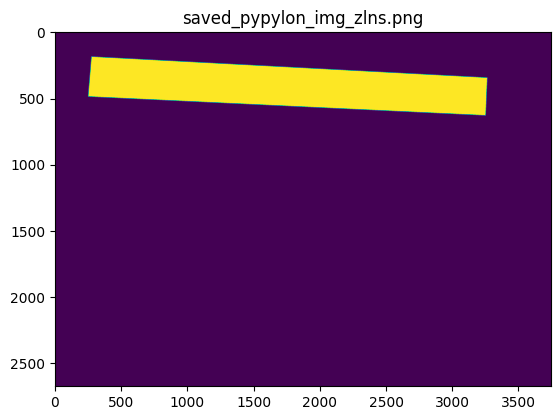

In [16]:
for i in range(0, train_df.shape[0]):
    bolt_connections = pd.read_json(train_df.iloc[i][6])

    points = np.array(pd.read_json(train_df.iloc[0][6]).points[0], dtype=np.float32)

    points[:, 0] = np.round(points[:, 0] * bolt_connections.original_width[0] / 100)
    points[:, 1] = np.round(points[:, 1] * bolt_connections.original_height[0] / 100)

    connection_mask = fillPolygon(points = np.array(points, dtype=np.int32), height = bolt_connections.original_height[0], width = bolt_connections.original_width[0])

    img_path = train_df.iloc[i, 4]

    img_path = '/' + img_path.split('=')[1]

    _, filenames = os.path.split(img_path)
    _, connection_mask = cv2.threshold(connection_mask, 0.1, 255, cv2.THRESH_BINARY)

    cv2.imwrite(SAVE_PATH + "connection" + '/' + filenames, connection_mask)
    
    plt.imshow(connection_mask)
    plt.title(filenames)
    plt.show()

## All Items

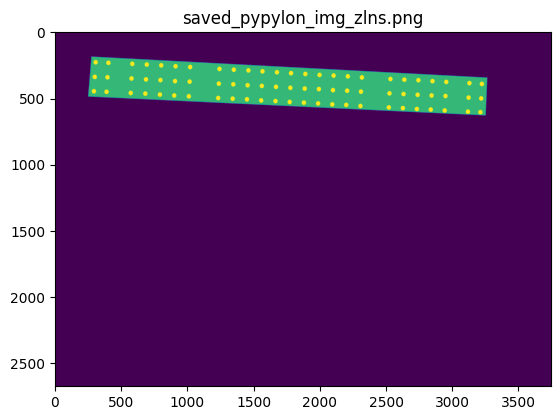

In [30]:
for i in range(0, train_df.shape[0]):
    bolt_holes = pd.read_json(train_df.iloc[i][3])
    bolt_connections = pd.read_json(train_df.iloc[i][7])

    x = np.round(bolt_holes.x * bolt_holes.original_width / 100)
    y = np.round(bolt_holes.y * bolt_holes.original_height / 100)

    center = pd.concat([x, y], axis=1, keys=["x", "y"], join="inner").astype("int16")

    radius_x = np.round(bolt_holes.radiusX * bolt_holes.original_width / 100)
    radius_y = np.round(bolt_holes.radiusY * bolt_holes.original_height / 100)

    radius = pd.concat([radius_x, radius_y], axis=1, keys=["x", "y"], join="inner").astype("int16")

    bolt_mask = drawEllipse(center, radius, height = bolt_holes.original_height[0], width = bolt_holes.original_width[0])
    bolt_mask[np.where(bolt_mask >= 1)] = 1

    points = np.array(pd.read_json(train_df.iloc[0][7]).points[0], dtype=np.float32)

    points[:, 0] = np.round(points[:, 0] * bolt_connections.original_width[0] / 100)
    points[:, 1] = np.round(points[:, 1] * bolt_connections.original_height[0] / 100)

    connection_mask = fillPolygon(points = np.array(points, dtype=np.int32), height = bolt_connections.original_height[0], width = bolt_connections.original_width[0])

    dst = cv2.addWeighted(connection_mask, 1, bolt_mask, 1, 0)

    img_path = train_df.iloc[i, 5]

    img_path = '/' + img_path.split('=')[1]

    _, filenames = os.path.split(img_path)

    _, bolt_mask = cv2.threshold(bolt_mask, 0.1, 128, cv2.THRESH_BINARY)
    _, connection_mask = cv2.threshold(connection_mask, 0.1, 255, cv2.THRESH_BINARY)

    cv2.imwrite(SAVE_PATH + "connection" + '/' + filenames, connection_mask)
    cv2.imwrite(SAVE_PATH + "bolt" + '/' + filenames, bolt_mask)

    # copyfile(REF_PATH + '/' + filenames, IMAGES_PATH + '/' + filenames)
    cv2.imwrite(SAVE_PATH + '/' + filenames, dst)

    plt.imshow(dst)
    plt.title(filenames)
    plt.show()